# Pyecharts 可视化教程

Echarts 是一个由百度开源的数据可视化javascript库，凭借着良好的交互性，精巧的图表设计，得到了众多开发者的认可。而 Python 是一门富有表达力的语言，很适合用于数据处理。当数据分析遇上数据可视化时，pyecharts 诞生了。

In [ ]:
# 安装pyecharts
!pip install pyecharts==0.5.11

# pyecharts_snapshot 提供图片导出功能
!pip install pyecharts_snapshot 

### 一，基本图表

pyecharts支持30多种不同的图表。我们只对其中最常用的几种类型进行基本范例的介绍。

下面是pyecharts主要类的继承关系。

![](class-relationship-diagram.png)

**1，柱形图示范**

柱形图适合表现几组数据之间的对比关系，柱形图的数据的数量一般不宜太多。

In [1]:
from  pyecharts import Bar

x = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋"]
y1 = [5, 20, 36, 10, 75]
y2 = [10, 25, 8, 60, 20]

bar = Bar(title = "产品月销量",width = 600,height = 420)
bar.add(name = "商家A", x_axis = x, y_axis = y1)
bar.add(name = "商家B", x_axis = x, y_axis = y2,is_xaxis_boundarygap =True)

bar.render('柱形图示范.html')
bar

**2，折线图示范**

折线图适合描述两个变量之间的函数关系，例如常用它来描述一个变量随时间的变化趋势。

In [2]:
from  pyecharts import Line

x = ['2018-{:0>2d}'.format(s) for s in range(1,13)]
y1 = [5,10,26,30,35,30,20,26,40,46,40,50]
y2 = [8,20,24,36,40,36,40,45,50,53,48,58]

line = Line(title = "月销售总额",width = 600,height = 420)

line.add(name = "商家A", x_axis = x, y_axis = y1,
         line_width = 3,line_color = 'red')
line.add(name = "商家B", x_axis = x, y_axis = y2,
         yaxis_min = 0,yaxis_max = 100,is_xaxis_boundarygap = False,
         is_datazoom_show =True,line_width = 2,line_color = 'cyan')

line.render('折线图示范.html')
line

**3，散点图示范**

散点图适合表现大量样本的多个属性的分布规律。散点图的每个点表示一个样本，每个坐标维度表示一个属性。

当样本属性维度多于2个时，可以使用点的颜色或大小等方式来表达更多属性维度。

In [3]:
from pyecharts import Scatter
import pandas as pd 

dfboy = pd.DataFrame()
dfboy['weight'] = [56,67,65,70,57,60,80,85,76,64]
dfboy['height'] = [162,170,168,172,168,172,180,176,178,170]

dfgirl = pd.DataFrame()
dfgirl['weight'] = [50,62,60,70,57,45,62,65,70,56]
dfgirl['height'] = [155,162,165,170,166,158,160,170,172,165]

scatter = Scatter(title = "体格数据",width = 600,height = 420)
scatter.add(name = "boy", x_axis = dfboy['weight'], y_axis = dfboy['height'])
scatter.add(name = "girl", x_axis = dfgirl['weight'], y_axis = dfgirl['height'],
           yaxis_min = 130,yaxis_max = 200,xaxis_min = 30,xaxis_max = 100)

scatter.render("散点图示范.html")

scatter

以下示范3个维度数据的散点图展示

In [4]:
from pyecharts import Scatter
import pandas as pd 

def custom_formatter(params):
    return (params.value[3] + ':' +
             str(params.value[0]) +','
             +str(params.value[1]) + ','
             +str(params.value[2]))

df = pd.DataFrame()
df['country'] = ["中国",'美国','德国','法国','英国','日本','俄罗斯','印度','澳大利亚','加拿大']
df['life-expectancy'] = [76.9,79.1,81.1,81.9,81.4,83.5,73.13,66.8,81.8,81.7]
df['capita-gdp'] = [13334,53354,44053,37599,38225,36162,23038,5903,44056,43294]
df['population'] = [1376048943,321773631,80688545,64395345,64715810,126573481,143456918,
                    1311050527,23968973,35939927]

scatter = Scatter(title = "各国发展水平",width = 600,height = 420)
scatter.add(name = '',
            x_axis = df['capita-gdp'],  # params.values[0]
            y_axis = df['life-expectancy'], # params.values[1]
            extra_data = df['population'].values.tolist(), # params.values[2]
            extra_name = df['country'].values.tolist(), # params.values[3]
            tooltip_formatter=custom_formatter,  #自定义提示框格式内容
            is_visualmap=True, # 显示
            visual_orient="horizontal",
            visual_type = 'size',  #可以是size或者color
            visual_dimension=2,
            visual_range=[20000000, 1500000000],
           )
scatter

**4，箱型图示范**

箱型图适合表现一组数据的统计分布规律，它能显示出一组数据的最大值、最小值、中位数、及上下四分位数。

箱型图的进阶版本是小提琴图，可以展示数据的密度估计曲线，可以用seaborn画出。

In [5]:
from pyecharts import Boxplot

x =['1班','2班','3班','4班']
y1=[78, 98, 56, 78, 90.0, 45, 78, 20, 87, 86, 74, 89, 94]
y2=[89, 82, 45, 67, 68, 78.0, 79, 98, 71, 56, 78, 81, 80]
y3=[90, 80, 60, 89, 76, 73.0, 72, 92, 89, 87, 65, 66, 76]
y4=[82, 72, 55, 100, 90.0, 78, 69, 67, 87, 66, 78, 71, 82]

box = Boxplot(title = '考试成绩箱型图',width = 600,height = 420)

# 预处理数据计算最大值，最小值，中位数以及上下四分位数
y_prepared = box.prepare_data([y1,y2,y3,y4]) 
box.add(name = '',x_axis = x,y_axis = y_prepared)

附：用seaborn 进行小提琴图的绘制

In [6]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [7]:
#设置风格
sns.set(style="white", context="notebook")
#处理中文问题
sns.set_style({'font.sans-serif':['simhei', 'Arial']}) 

In [8]:
dfdata = pd.DataFrame()
dfdata['score'] = y1 + y2 + y3 + y4
dfdata['class'] = ['1班']*len(y1)+['2班']*len(y2)+['3班']*len(y3)+['4班']*len(y4)

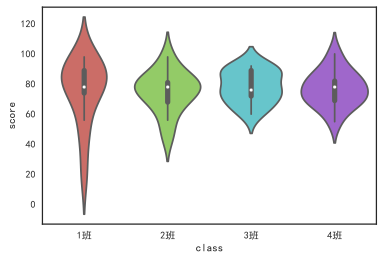

In [9]:
ax = sns.violinplot(x= 'class', y = 'score',data = dfdata,
            palette = 'hls', # 设置调色板
            inner = 'box',   # 设置内部显示类型 → “box”, “quartile”, “point”, “stick”, None
           )

**5，词云图示范**

词云图适合表现不同关键词的出现频率或重要性程度。

In [10]:
from pyecharts import WordCloud

words = ['python','jupyter','numpy','pandas','matplotlib','sklearn',
        'xgboost','lightGBM','simpy','keras','tensorflow',
         'hive','hadoop','spark']
counts = [100,90,65,95,50,60,70,70,20,70,80,80,60,60]

cloud = WordCloud(title = '数据算法常用工具',width = 600,height = 420)
cloud.add(name = 'utils',attr = words,value = counts,
          shape = "circle",word_size_range = (10,70))

**6，地理坐标系图**

地理坐标系图适合表现和国家，省份，以及城市，经纬度位置相关联的数据分布规律。

Geo表达和城市关联的数据,Map表达和国家和省份关联的数据。

In [52]:
# 全国城市地图示例
from pyecharts import Geo

data = [
    ("海门", 9),("鄂尔多斯", 12),("招远", 12),("舟山", 12),("齐齐哈尔", 14),("盐城", 15),
    ("惠州", 37),("江阴", 37),("蓬莱", 37),("韶关", 38),("嘉峪关", 38),("广州", 38),
    ("张家港", 52),("三门峡", 53),("锦州", 54),("南昌", 54),("柳州", 54),("三亚", 54),
    ("呼和浩特", 58),("成都", 58),("大同", 58),("镇江", 59),("桂林", 59),("张家界", 59),
    ("北京", 79),("徐州", 79),("衡水", 80),("包头", 80),("绵阳", 80),("乌鲁木齐", 84),
    ("菏泽", 194),("合肥", 229),("武汉", 273),("大庆", 279)]

geo = Geo(
    "全国部分城市空气质量",
    title_color="#fff",
    title_pos="center",
    width=800,
    height=600,
    background_color="#404a59",
)
attr, value = geo.cast(data)
geo.add(
    "",
    attr,
    value,
    visual_range=[0, 200],
    visual_text_color="#fff",
    symbol_size=15,
    is_visualmap=True,
)
geo

In [54]:
#  全国省份地图

from pyecharts import Map
value = [155, 10, 66, 78]
attr = ["福建", "山东", "北京", "上海"]
m = Map("全国省份地图示例", width=800, height=600)
m.add("", attr, value, maptype='china',
        is_visualmap=True, 
        is_piecewise=True,
        visual_text_color="#000",
        visual_range_text=["", ""],
        pieces=[
            {"max": 160, "min": 70, "label": "高数值"},
            {"max": 69, "min": 0, "label": "低数值"},
        ])
m

In [55]:
# 世界地图示例
from pyecharts import Map
countries= ["China", "Canada", "India", "Russia", "United States","Japan"]
capita_gdp = [13334, 43294, 5903, 23038, 53354,36162]
population = [1376048943, 35939927, 1311050527, 143456918, 321773631,126573481]
life_expectancy = [76.9,81.7,66.8,73.13,79.1,73.13]

m = Map("世界经济发展水平", width=800, height=600)
m.add(
    "人均GDP",
    attr = countries,
    value = capita_gdp,
    maptype="world",
    is_visualmap=True,
    visual_range = [5000,60000],
    visual_text_color="#000",
    is_map_symbol_show=False,
)


### 二，图表配置

如果要对绘制的图表进行诸如图像尺寸，坐标轴刻度，线的颜色，以及网格线等各个细节方面的修改，我们则需要手动对图表进行配置，而不是依赖于默认配置。

图表配置有3种主要方式：

1，修改图表主题风格：利用configure或use_theme指定图表主题风格，对图表整体颜色风格产生影响。 

2，初始化图表通用属性：创建图表时指定图表height,title等属性，对图像尺寸和标题等通用属性产生影响。

3，配置特定元素属性：使用add给图表配置xyAxis,datazoom,lineStyle等特定元素属性。

**1，修改图表主题风格**

可以使用use_theme修改单个图表主题，也可以用configure修改全局图表风格。

In [ ]:
# 默认主题效果
import random
from pyecharts import Bar

X_AXIS = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
bar = Bar("默认主题效果", "这里是副标题")
bar.add("商家A", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家B", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家C", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家D", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar

In [57]:
# 使用dark主题
import random
from pyecharts import Bar


X_AXIS = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
bar = Bar("dark主题展示", "这里是副标题")
bar.use_theme("dark")
bar.add("商家A", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家B", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家C", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家D", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar

In [ ]:
# 安装主题插件获取更多主题
!pip install echarts-themes-pypkg

主题插件支持以下主题
* vintage
* macarons 美
* shine    美+++
* roma     美
* westeros
* wonderland
* chalk
* halloween 美+
* essos
* walden
* purple-passion
* romantic

In [58]:
import random
from pyecharts import Bar


X_AXIS = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
bar = Bar("shine主题展示", "这里是副标题")
bar.use_theme("shine")
bar.add("商家A", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家B", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家C", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar.add("商家D", X_AXIS, [random.randint(10, 100) for _ in range(6)])
bar

如果要设置某个主题风格应用到所有图表，可以在绘图开始前用configure进行设置。

In [59]:
from pyecharts import configure
# 将这行代码置于首部
configure(global_theme='shine')

In [60]:
from pyecharts import Pie
attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
value = [11, 12, 13, 10, 10, 10]
pie = Pie("销售额占比",width = 600,height = 420)
pie.add("", attr, value, is_label_show=True)

**2，初始化图表通用属性**

图表通用属性指的是图表的title,subtitle,height,width,title_pos,title_color,title_text_size,background_color等属性，这些属性对所有类型的图表都适用。

所有通用属性设置方式详细参见：https://github.com/lyhue1991/pyecharts/blob/master/docs/zh-cn/charts_configure.md

In [61]:
from pyecharts import Pie
attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
value = [11, 12, 13, 10, 10, 10]

# 初始化图表通用属性
pie = Pie(title = "销售额占比",
          title_pos = 'center', # 标题居中
          title_top = 'bottom', # 标题在底部
          title_color = '#0000ff', # 标题颜色设置为蓝色，256位rgb格式
          background_color = "#aee", # 设置背景颜色，16位rgb格式
          width = 600,height = 420)

pie.add("", attr, value, is_label_show=True)

**3，配置特定元素属性**

特定元素属性包括xyAxis,dataZoom,lineStyle,markLine-markPoint,visualMap等元素属性，这些元素只在某些种类的图表中适用。例如xyAxis只在Line、Bar、Scatter、EffectScatter、Kline这几类图表中适用。

所有特定元素属性设置方式详细参见：https://github.com/lyhue1991/pyecharts/blob/master/docs/zh-cn/charts_configure.md

In [62]:
# 设置xyAxis示范

from  pyecharts import Line

x = ['2018-{:0>2d}'.format(s) for s in range(1,13)]
y1 = [5,10,26,30,35,30,20,26,40,46,40,50]
y2 = [8,20,24,36,40,36,40,45,50,53,48,58]

line = Line(title = "月销售总额",width = 600,height = 420)

line.add(name = "商家A", x_axis = x, y_axis = y1)
line.add(name = "商家B", x_axis = x, y_axis = y2,
         #
         #=====设置xyAxis=====
         yaxis_min = 0,yaxis_max = 100,  # 设置y坐标轴刻度范围
         xaxis_name = '月份', yaxis_name = '销售额', #x轴名称，y轴名称
         xaxis_name_gap =  40, # x轴名称与轴距离
         xaxis_rotate = 30,  # x轴刻度旋转角度
         is_splitline_show = True, # 显示y轴网格线
         is_xaxislabel_align = True # x轴刻度和标签是否对齐
        )
line

In [63]:
# 设置dataZoom示范

from  pyecharts import Line

x = ['2018-{:0>2d}'.format(s) for s in range(1,13)]
y1 = [5,10,26,30,35,30,20,26,40,46,40,50]
y2 = [8,20,24,36,40,36,40,45,50,53,48,58]

line = Line(title = "月销售总额",width = 600,height = 420)

line.add(name = "商家A", x_axis = x, y_axis = y1)
line.add(name = "商家B", x_axis = x, y_axis = y2,
         #
         #=====设置xyAxis=====
         is_xaxis_boundarygap = False,  # x坐标刻度对准数据，而不是作为分类边界
         #
         #=====设置dataZoom=====
         is_datazoom_show = True, #显示 dataZoom控制条
         datazoom_type = 'both' # 可以是slider,inside或both
         #
         #
        )
line

In [64]:
# 设置lineStyle示范

from  pyecharts import Line

x = ['2018-{:0>2d}'.format(s) for s in range(1,13)]
y1 = [5,10,26,30,35,30,20,26,40,46,40,50]
y2 = [8,20,24,36,40,36,40,45,50,53,48,58]

line = Line(title = "月销售总额",width = 600,height = 420)

line.add(name = "商家A", x_axis = x, y_axis = y1,
         #
         #=====设置lineStyle=====
         line_width = 2,
         line_opacity = 0.5, # 透明度
         line_color = 'red'
        )
line.add(name = "商家B", x_axis = x, y_axis = y2,
         #
         #=====设置xyAxis=====
         is_xaxis_boundarygap = False,  # x坐标刻度对准数据，而不是作为分类边界
         #
         #=====设置dataZoom=====
         is_datazoom_show = True, #显示 dataZoom控制条
         #
         #=====设置lineStyle=====
         line_width = 3,
         line_color = '#11ffbb',
         line_type = 'dashed', # 线型，可以是solid,dashed,或者dotted
        )
line

In [65]:
# 设置markPoint和markLine示范

from  pyecharts import Line

x = ['2018-{:0>2d}'.format(s) for s in range(1,13)]
y1 = [5,10,26,30,35,30,20,26,40,46,40,50]
y2 = [8,20,24,36,40,36,40,45,50,53,48,58]

line = Line(title = "月销售总额",width = 600,height = 420)

line.add(name = "商家A", x_axis = x, y_axis = y1,
         #
         #=====设置lineStyle=====
         line_width = 2,
         line_opacity = 0.5, # 透明度
         line_color = 'red',
         #
         #=====设置markPoint&markLine=====
         mark_point = ['min','max'], #标记点
         mark_line = ['average'] #标记线
        )
line.add(name = "商家B", x_axis = x, y_axis = y2,
         #
         #=====设置xyAxis=====
         is_xaxis_boundarygap = False,  # x坐标刻度对准数据，而不是作为分类边界
         yaxis_min = 0,yaxis_max = 100,  # 设置y坐标轴刻度范围
         #
         #=====设置dataZoom=====
         is_datazoom_show = True, #显示 dataZoom控制条
         #
         #=====设置lineStyle=====
         line_width = 3,
         line_type = 'dashed', # 线型，可以是solid,dashed,或者dotted
         
         #=====设置markPoint&markLine=====
         mark_point = [{"coord": ['2018-09', 60], "name": "2018/09销售目标"}, 
          {"coord": ['2018-11', 80], "name": "2018/10销售目标"}]  # 自定义标记点
        )
line

如果需要反复使用相同的配置，可以使用Style类简化这个过程。

In [66]:
from pyecharts import Pie,Style

pie = Pie('各类电影中"好片"所占的比例', "数据来自豆瓣", title_pos='center')
style = Style()
pie_style = style.add(
    label_pos="center",
    is_label_show=True,
    label_text_color=None
)

pie.add(
    "", ["剧情", ""], [25, 75], center=[10, 30], radius=[18, 24], **pie_style
)
pie.add(
    "", ["奇幻", ""], [24, 76], center=[30, 30], radius=[18, 24], **pie_style
)
pie.add(
    "", ["爱情", ""], [14, 86], center=[50, 30], radius=[18, 24], **pie_style
)
pie.add(
    "", ["惊悚", ""], [11, 89], center=[70, 30], radius=[18, 24], **pie_style
)
pie.add(
    "", ["冒险", ""], [27, 73], center=[90, 30], radius=[18, 24], **pie_style
)
pie.add(
    "", ["动作", ""], [15, 85], center=[10, 70], radius=[18, 24], **pie_style
)
pie.add(
    "", ["喜剧", ""], [54, 46], center=[30, 70], radius=[18, 24], **pie_style
)
pie.add(
    "", ["科幻", ""], [26, 74], center=[50, 70], radius=[18, 24], **pie_style
)
pie.add(
    "", ["悬疑", ""], [25, 75], center=[70, 70], radius=[18, 24], **pie_style
)
pie.add(
    "", ["犯罪", ""],[28, 72],center=[90, 70], radius=[18, 24], legend_top="bottom", 
    **pie_style
)
pie

### 三，图表组合

如果要把多张图作为子图绘制在一张图中，或者要把柱状图和折线图这样不同类型的图表叠加在一起的时候，我们需要使用对基本图表进行一些组合来实现更加丰富的呈现效果。

在pyecharts 中 对图表进行组合的方式主要有：Grid, Overlap, Page, Timeline这四种方式。

**1，Grid图表组合**

Grid图表组合可以并行显示多张图，类似子图的作用。Grid中的子图可以是Overlap。

In [67]:
from pyecharts import Bar, Line, Grid

x = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
y1 = [5, 20, 36, 10, 75, 90]
y2 = [10, 25, 8, 60, 20, 80]
bar = Bar("柱状图示例", height=720)
bar.add("商家A", x, y1, is_stack=True)
bar.add("商家B", x, y2, is_stack=True)


line = Line("折线图示例", title_top="50%")
x = ["周一", "周二", "周三", "周四", "周五", "周六", "周日"]
line.add(
    "最高气温",
    x,
    [11, 11, 15, 13, 12, 13, 10],
    mark_point=["max", "min"],
    mark_line=["average"],
)
line.add(
    "最低气温",
    x,
    [1, -2, 2, 5, 3, 2, 0],
    mark_point=["max", "min"],
    mark_line=["average"],
    legend_top="50%",
)

grid = Grid()
#利用grid_bottom,grid_top,grid_left,grid_right四个参数控制子图的相对位置
grid.add(bar, grid_bottom="60%")  
grid.add(line, grid_top="60%")
grid

利用Grid解决dataZoom与X轴标签重叠的问题

In [68]:
from pyecharts import Bar, Grid

x = [
    "名字很长的x轴1",
    "名字很长的x轴2",
    "名字很长的x轴3",
    "名字很长的x轴4",
    "名字很长的x轴5",
    "名字很长的x轴6",
    "名字很长的x轴7",
    "名字很长的x轴8",
    "名字很长的x轴9",
]
y = [10, 20, 30, 40, 50, 60, 70, 80, 90]

grid = Grid()
bar = Bar("利用 Grid 解决 dataZoom 与 X 轴标签重叠问题")
bar.add("", x, y, is_datazoom_show=True, xaxis_interval=0, xaxis_rotate=30)

# 把 bar 加入到 grid 中，并适当调整 grid_bottom 参数，使 bar 图整体上移
grid.add(bar, grid_bottom="25%")


**2，Overlap图表组合**

Overlap图表组合可以将不同类型的图表画在同一张图上。

In [69]:
from pyecharts import Bar, Line, Overlap

attr = ['A', 'B', 'C', 'D', 'E', 'F']
v1 = [10, 20, 30, 40, 50, 60]
v2 = [38, 28, 58, 48, 78, 68]
bar = Bar("Line - Bar 示例")
bar.add("bar", attr, v1)
line = Line()
line.add("line", attr, v2)

overlap = Overlap()
overlap.add(bar)
overlap.add(line)
overlap

Overlap显示双坐标轴

In [70]:
from pyecharts import Line, Bar, Overlap

attr = ["{}月".format(i) for i in range(1, 13)]
v1 = [2.0, 4.9, 7.0, 23.2, 25.6, 76.7, 135.6, 162.2, 32.6, 20.0, 6.4, 3.3]
v2 = [2.6, 5.9, 9.0, 26.4, 28.7, 70.7, 175.6, 182.2, 48.7, 18.8, 6.0, 2.3]
v3 = [2.0, 2.2, 3.3, 4.5, 6.3, 10.2, 20.3, 23.4, 23.0, 16.5, 12.0, 6.2]

bar = Bar()
bar.add("蒸发量", attr, v1)
bar.add("降水量", attr, v2, yaxis_formatter=" ml",
        yaxis_interval=50, yaxis_max=250)

line = Line()
line.add("平均温度", attr, v3, yaxis_formatter=" °C", yaxis_interval=5)

overlap = Overlap(width=800, height=500)
# 默认不新增 x y 轴，并且 x y 轴的索引都为 0
overlap.add(bar)
# 新增一个 y 轴，此时 y 轴的数量为 2，第二个 y 轴的索引为 1（索引从 0 开始），所以设置 yaxis_index = 1
# 由于使用的是同一个 x 轴，所以 x 轴部分不用做出改变
overlap.add(line, yaxis_index=1, is_add_yaxis=True)
overlap

**3，Pages图表组合**

Pages可以将多张图表按顺序展示在一张网页中，适合制作图形化报表。Pages中的图表可以是Grid,Overlap或Timeline.

In [71]:
#coding=utf-8
from __future__ import unicode_literals
from pyecharts import Bar, Scatter3D
from pyecharts import Page

page = Page()         # step 1

# bar
attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
v1 = [5, 20, 36, 10, 75, 90]
v2 = [10, 25, 8, 60, 20, 80]
bar = Bar("柱状图数据堆叠示例")
bar.add("商家A", attr, v1, is_stack=True)
bar.add("商家B", attr, v2, is_stack=True)
page.add(bar)         # step 2

# scatter3D
import random
data = [
    [random.randint(0, 100),
    random.randint(0, 100),
    random.randint(0, 100)] for _ in range(80)
]
range_color = [
    '#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
    '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
scatter3D = Scatter3D("3D 散点图示例", width=800, height=600)
scatter3D.add("", data, is_visualmap=True, visual_range_color=range_color)
page.add(scatter3D)  # step 2

page    # step 3

**4，Timeline图表组合**

Timeline可以将多个图表制作成动画。

In [72]:
from pyecharts import Bar, Timeline
from random import randint

attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
bar_1 = Bar("2012 年销量", "数据纯属虚构")
bar_1.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_1.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_1.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_1.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_2 = Bar("2013 年销量", "数据纯属虚构")
bar_2.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_2.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_2.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_2.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_3 = Bar("2014 年销量", "数据纯属虚构")
bar_3.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_3.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_3.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_3.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_4 = Bar("2015 年销量", "数据纯属虚构")
bar_4.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_4.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_4.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_4.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_5 = Bar("2016 年销量", "数据纯属虚构")
bar_5.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_5.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_5.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_5.add("冬季", attr, [randint(10, 100) for _ in range(6)], is_legend_show=True)

timeline = Timeline(is_auto_play=True,
                    timeline_bottom=0,
                    timeline_play_interval=800  # 每800ms播放一张
                   )

timeline.add(bar_1, '2012 年')
timeline.add(bar_2, '2013 年')
timeline.add(bar_3, '2014 年')
timeline.add(bar_4, '2015 年')
timeline.add(bar_5, '2016 年')
timeline